In [1]:
library(fma)
library(fpp)
library(forecast)

Loading required package: tseries
Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: expsmooth
Loading required package: lmtest


In [2]:
ds_full = visitors
start(visitors)
end(visitors)

[1] 1985    5

[1] 2005    4

## 3a)

December is peak, May is lowest. Pretty steady upward trend, other than May 2003.

The following article explains May 2003 in New Zealand (I know this data is Australia, but really what's the difference?????)

http://www.scoop.co.nz/stories/BU0306/S00222/visitor-arrivals-drop-13-percent.htm

Warning message:
In window.default(x, ...): 'end' value not changed

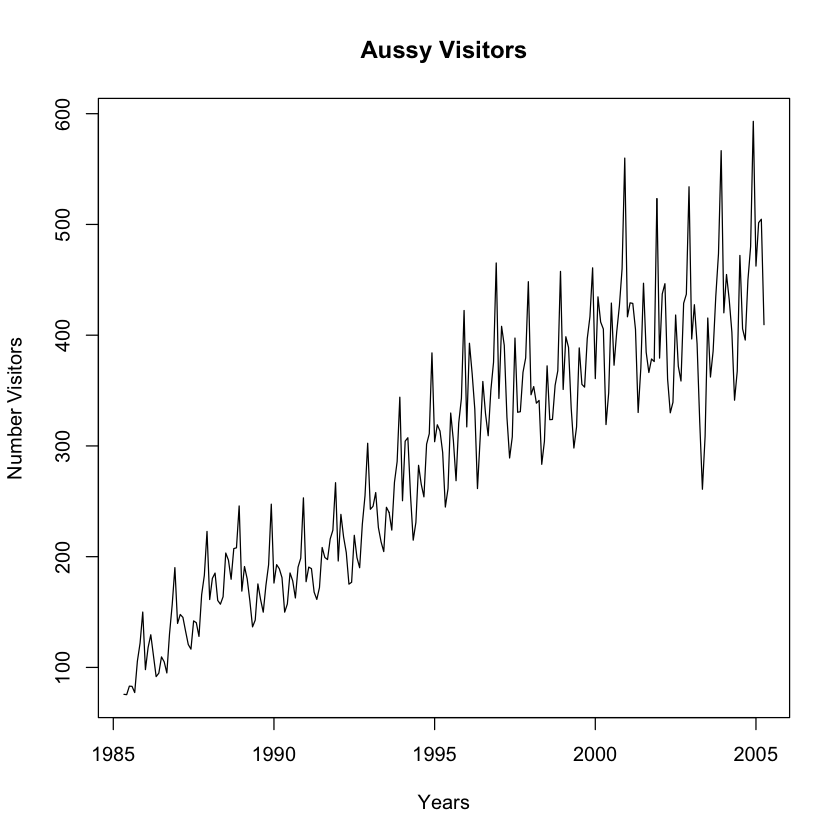

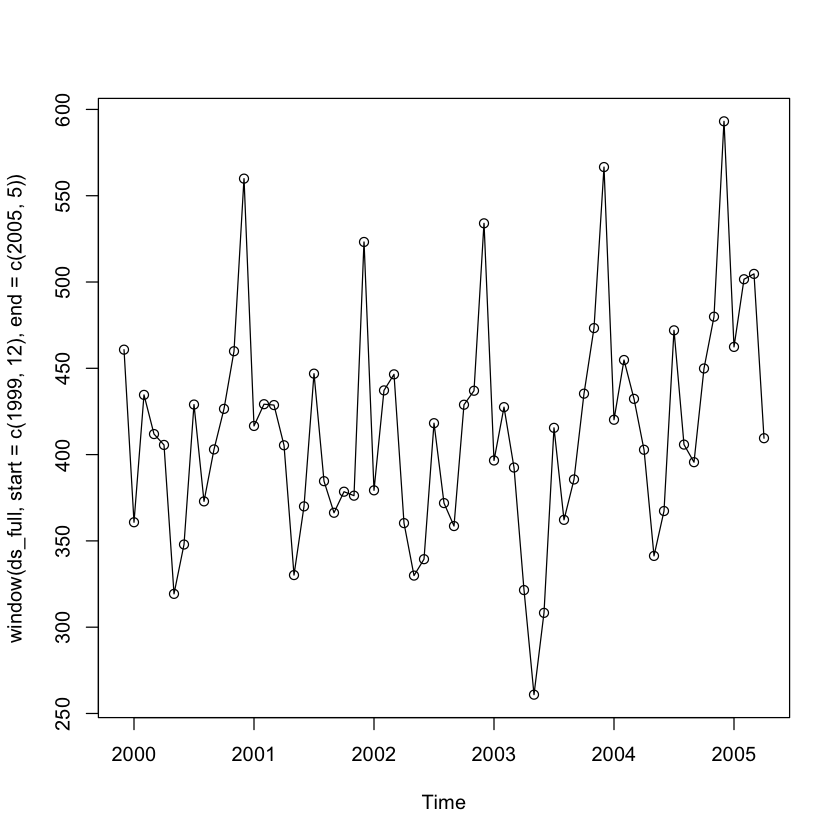

In [3]:
plot(ds_full, main="Aussy Visitors", xlab="Years", ylab="Number Visitors")
plot(window(ds_full, start=c(1999, 12), end=c(2005, 5)), type="o")

Warning message:
In window.default(x, ...): 'start' value not changedWarning message:
In window.default(x, ...): 'end' value not changed

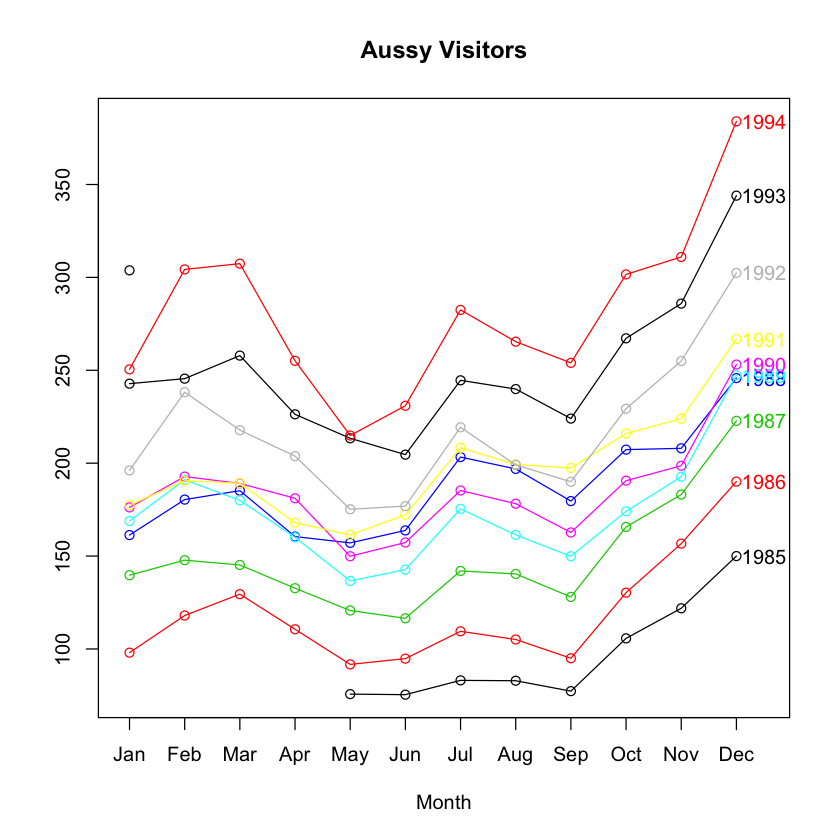

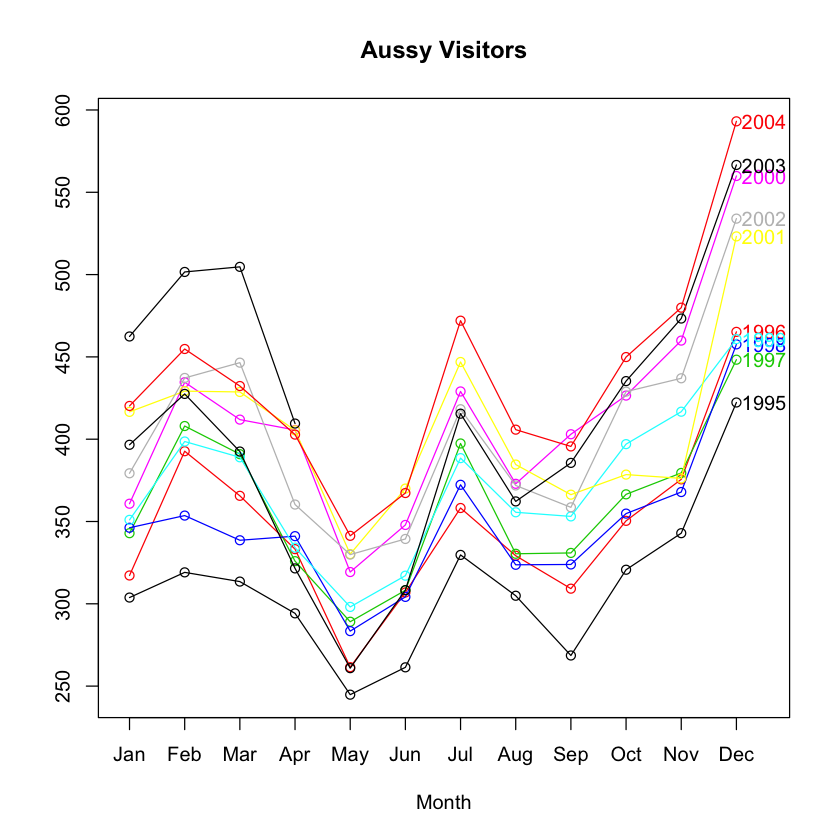

In [4]:
seasonplot(window(ds_full, start=1985, end=1995), year.labels=TRUE, col=1:10, main="Aussy Visitors")
seasonplot(window(ds_full, start=1995, end=2006), year.labels=TRUE, col=1:10, main="Aussy Visitors")

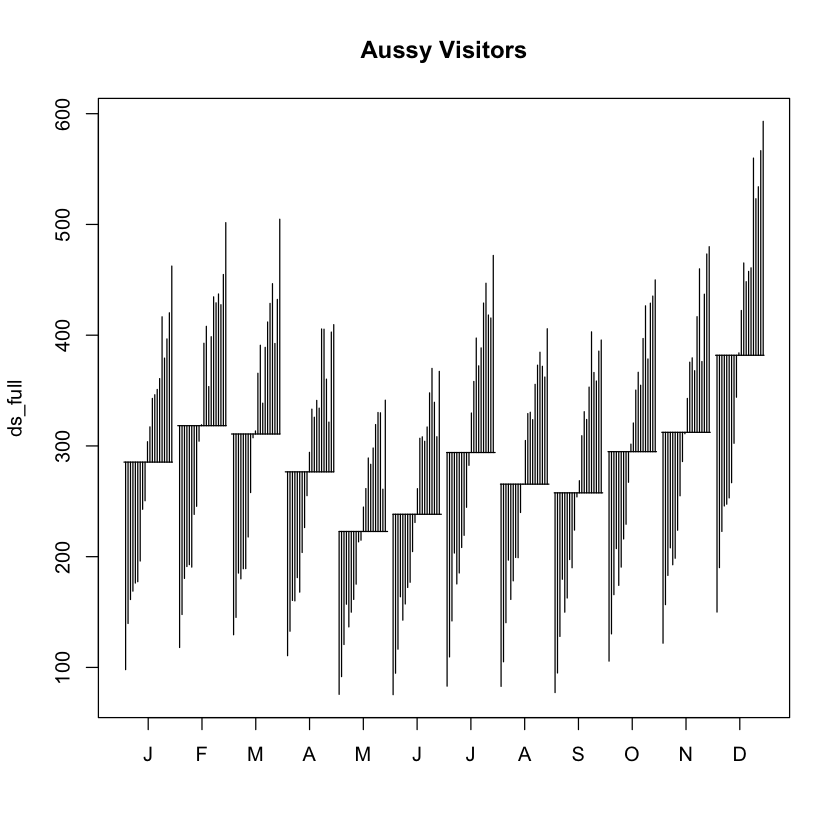

In [5]:
monthplot(ds_full, main="Aussy Visitors", type="h")

## 3b) HW Multiplicative Model

We need multiplicative here because the seasonal peaks and valleys are getting bigger through the years, they are not just linear (additive)

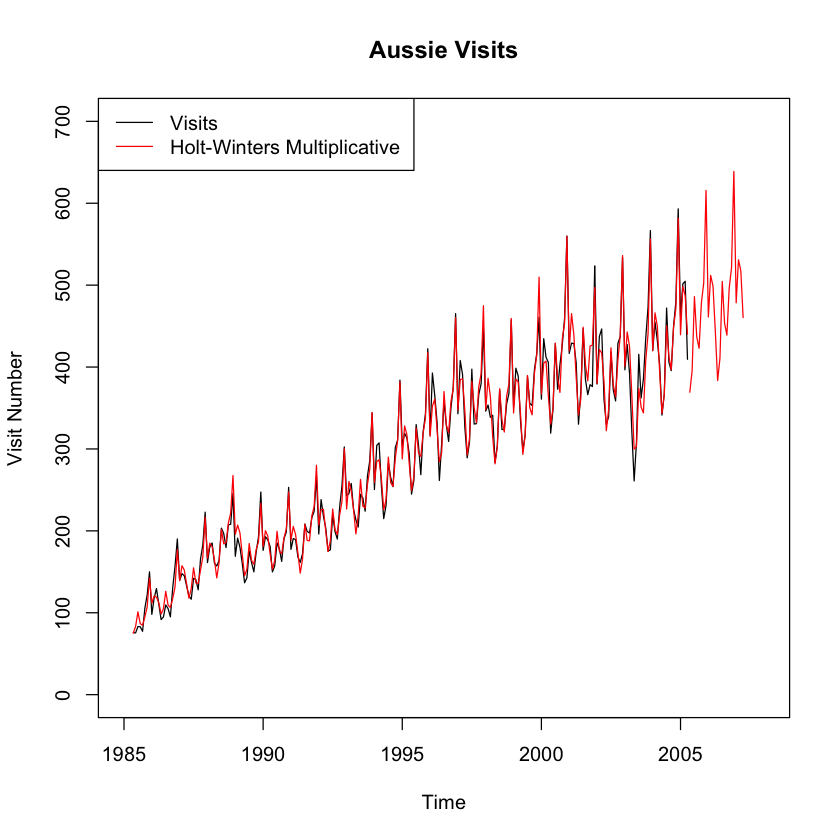

In [6]:
hw_mult = hw(ds_full, seasonal="multiplicative", h=24)

plot(ds_full, main="Aussie Visits", xlim=c(1985, 2008), ylim=c(0, 700), ylab="Visit Number", xlab="Time")

# Plot the fitted values to original
lines(fitted(hw_mult), col="red")
# Plot the forecasted values
lines(hw_mult$mean, col="red")

legend("topleft"
       , lty=1
       , col=c("black", "red")
       , c("Visits", "Holt-Winters Multiplicative")
       )

In [7]:
summary(hw_mult)


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(x = ds_full, h = 24, seasonal = "multiplicative") 

  Smoothing parameters:
    alpha = 0.4154 
    beta  = 0.0063 
    gamma = 1e-04 

  Initial states:
    l = 90.826 
    b = 3.0992 
    s=0.932 1.0506 1.0811 0.9771 1.3085 1.0715
           1.0229 0.9074 0.9401 1.0494 0.8568 0.8026

  sigma:  0.055

     AIC     AICc      BIC 
2631.589 2634.029 2687.280 

Error measures:
                     ME    RMSE      MAE        MPE     MAPE      MASE
Training set -0.9498442 14.8295 10.96716 -0.8150922 4.271167 0.4050069
                  ACF1
Training set 0.2223887

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
May 2005       369.3175 343.3002 395.3348 329.5275 409.1076
Jun 2005       395.5080 365.2767 425.7393 349.2733 441.7427
Jul 2005       485.9444 446.0391 525.8497 424.9145 546.9743
Aug 2005       436.7465 398.5070 474.9859 378.2643 495.2287
S

## 3c) Variations - Dampening

First choosing to dampen because the gaining trend just cannot go on forever. Next one is Dampening & exponential just to see what happens.

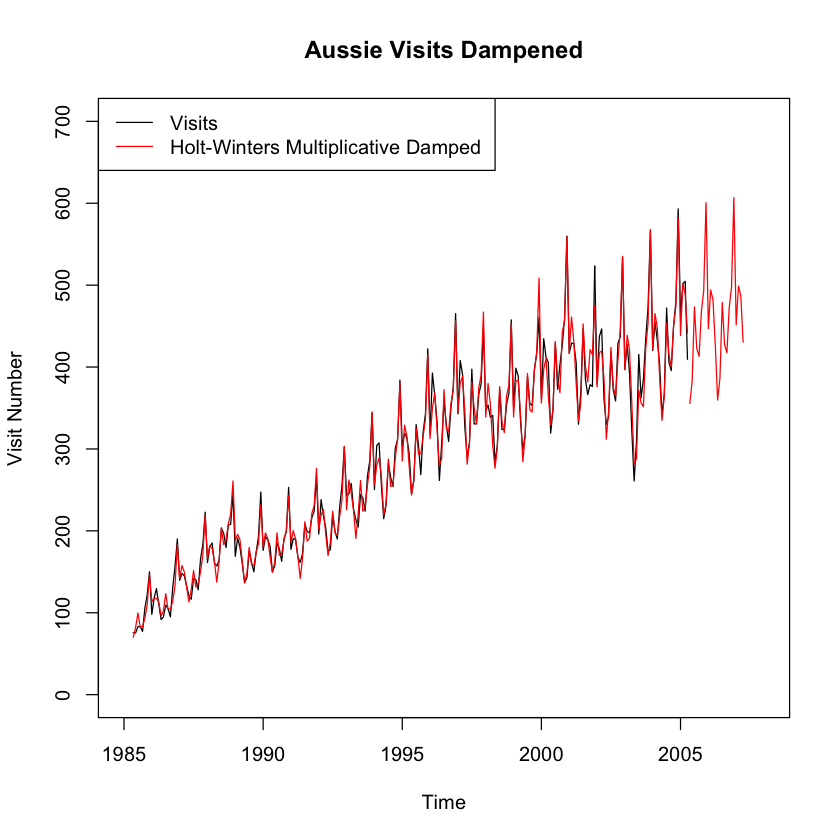

In [8]:
hw_mult_damp = hw(ds_full, seasonal="multiplicative", damped=TRUE, h=24)

plot(ds_full, main="Aussie Visits Dampened", xlim=c(1985, 2008), ylim=c(0, 700), ylab="Visit Number", xlab="Time")

# Plot the fitted values to original
lines(fitted(hw_mult_damp), col="red")
# Plot the forecasted values
lines(hw_mult_damp$mean, col="red")

legend("topleft"
       , lty=1
       , col=c("black", "red")
       , c("Visits", "Holt-Winters Multiplicative Damped")
       )

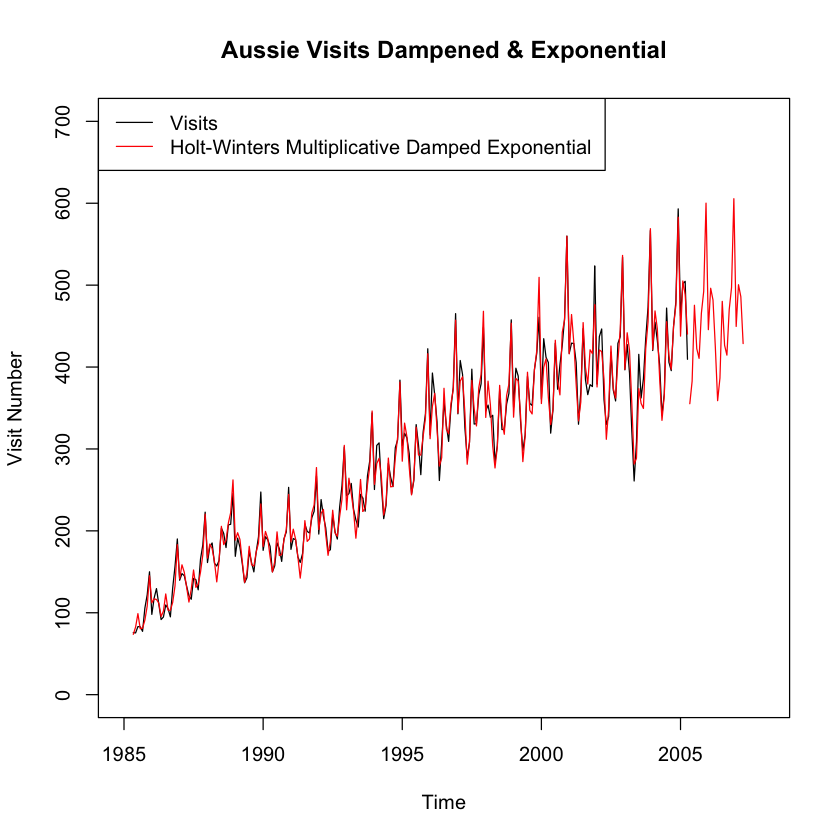

In [9]:
hw_mult_damp_exp = hw(ds_full, seasonal="multiplicative", damped=TRUE, exponential=TRUE, h=24)

plot(ds_full, main="Aussie Visits Dampened & Exponential", xlim=c(1985, 2008), ylim=c(0, 700), ylab="Visit Number", xlab="Time")

# Plot the fitted values to original
lines(fitted(hw_mult_damp_exp), col="red")
# Plot the forecasted values
lines(hw_mult_damp_exp$mean, col="red")


legend("topleft"
       , lty=1
       , col=c("black", "red")
       , c("Visits", "Holt-Winters Multiplicative Damped Exponential")
       )

## 3d) RMSE

They are not that different, so I prefer the one that is easiest to explain, which is the basic one.

In [10]:
rmse_mult = format(round(accuracy(hw_mult)[2], 2), nsmall=2)
rmse_mult_damp = format(round(accuracy(hw_mult_damp)[2], 2), nsmall=2)
rmse_mult_damp_exp = format(round(accuracy(hw_mult_damp_exp)[2], 2), nsmall=2)
data.frame(Model = c("Mult", "Mult Damp", "Mult Damp Exp"), RMSE = c(rmse_mult, rmse_mult_damp, rmse_mult_damp_exp))

Model,RMSE
Mult,14.83
Mult Damp,14.45
Mult Damp Exp,14.46


## 3e) ETS

Looks like ETS is choosing Additive Holt-Winters Multiplicative, which is the same as our 3b). Whoohoo! We are awesome. It is odd that it is choosing a different alpha, beta, & gamma than the one in 3b)

In [15]:
ets = ets(ds_full)

In [13]:
summary(ets)

ETS(M,A,M) 

Call:
 ets(y = ds_full) 

  Smoothing parameters:
    alpha = 0.6567 
    beta  = 0.0012 
    gamma = 0.1712 

  Initial states:
    l = 87.2703 
    b = 2.6226 
    s=0.9407 1.063 1.0656 0.9699 1.366 1.107
           1.003 0.8324 0.9317 0.9993 0.8619 0.8595

  sigma:  0.0514

     AIC     AICc      BIC 
2598.980 2601.419 2654.670 

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -1.536043 15.86105 11.53405 -0.7017724 4.076346 0.4259416
                     ACF1
Training set -0.004687451


## Redo 3b) with 3e) alpha, beta, & gamma

In [16]:
hw_mult = hw(ds_full, seasonal="multiplicative", h=24, alpha=.6567, beta=0.0012, gamma=0.1712)

In [17]:
summary(hw_mult)


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(x = ds_full, h = 24, seasonal = "multiplicative", alpha = 0.6567,  

 Call:
     beta = 0.0012, gamma = 0.1712) 

  Smoothing parameters:
    alpha = 0.6567 
    beta  = 0.0012 
    gamma = 0.1712 

  Initial states:
    l = 83.7741 
    b = 1.5385 
    s=0.9379 1.0452 1.0766 0.9995 1.3327 1.0515
           0.9451 0.8596 0.9489 1.0566 0.9042 0.8422

  sigma:  0.0547

     AIC     AICc      BIC 
2620.202 2621.813 2665.451 

Error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.05466624 15.39276 11.36299 -0.1326975 4.146955 0.4196247
                    ACF1
Training set -0.03337632

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
May 2005       359.6369 334.4153 384.8586 321.0637 398.2101
Jun 2005       394.4527 361.3581 427.5474 343.8388 445.0666
Jul 2005       492.3824 445.2667 539.4981 420.3